In [3]:
# Gerekli modüllerin içe aktarılması
import sys
import os
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# Proje dizininin sys.path'e eklenmesi (eğer gerekliyse)
project_root = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
sys.path.append(project_root)

# config.py dosyasının içe aktarılması
from config import config

# Veritabanı bağlantısının kurulması
db_config = config.DATABASE
connection_string = f"{db_config['drivername']}://" \
                    f"{db_config['username']}:{db_config['password']}@" \
                    f"{db_config['host']}:{db_config['port']}/" \
                    f"{db_config['database']}"

engine = create_engine(connection_string)

# Verilerin veritabanından okunması
global_50_df = pd.read_sql('SELECT * FROM spotify_tracks', con=engine)

# Verilerin görüntülenmesi
global_50_df.head()


,track_name,artist_name,album_name,release_date,total_tracks,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature
0,APT.,ROSÉ,APT.,2024-10-18,1,95,0.777,0.783,0,-4.477,0,0.2600,0.02830,0.0000,0.355,0.939,149.027,5vNRhkKd0yEAg8suGBpjeY,4
1,Die With A Smile,Lady Gaga,Die With A Smile,2024-08-16,1,100,0.521,0.592,6,-7.777,0,0.0304,0.30800,0.0000,0.122,0.535,157.969,2plbrEY59IikOBgBGLjaoe,3
2,BIRDS OF A FEATHER,Billie Eilish,HIT ME HARD AND SOFT,2024-05-17,10,97,0.747,0.507,2,-10.171,1,0.0358,0.20000,0.0608,0.117,0.438,104.978,6dOtVTDdiauQNBQEDOtlAB,4
3,St. Chroma (feat. Daniel Caesar),"Tyler, The Creator",CHROMAKOPIA,2024-10-28,14,83,0.576,0.884,0,-5.058,1,0.5550,0.35700,0.0000,0.368,0.373,150.450,1QoyuMHNBe7lg3YW4Qtll4,4
4,Who,Jimin,MUSE,2024-07-19,7,92,0.660,0.756,0,-3.743,0,0.0320,0.00289,0.0000,0.193,0.838,116.034,7tI8dRuH2Yc6RuoTjxo4dU,4


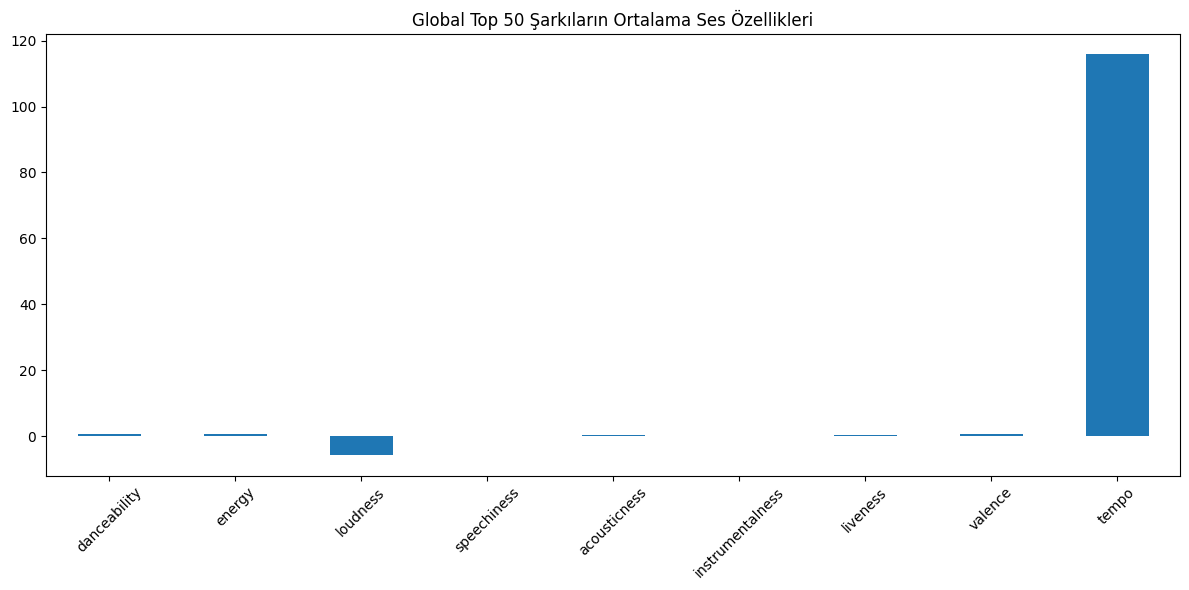

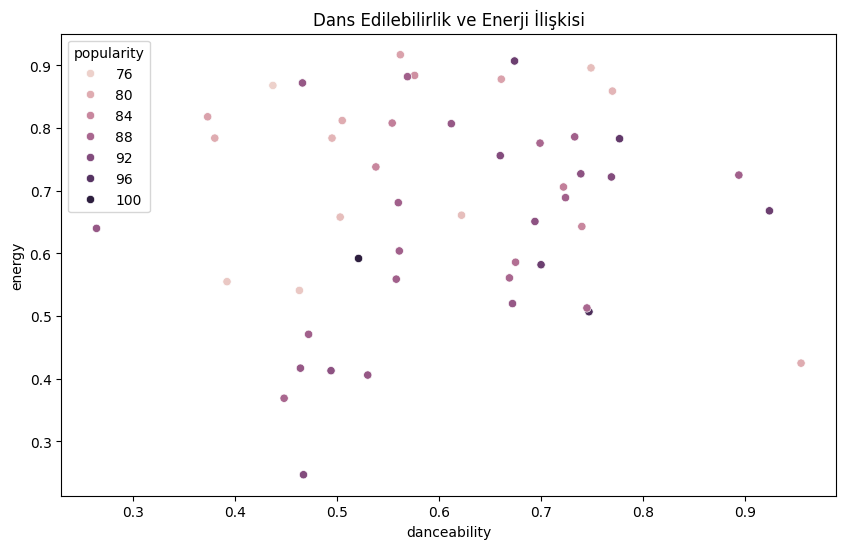

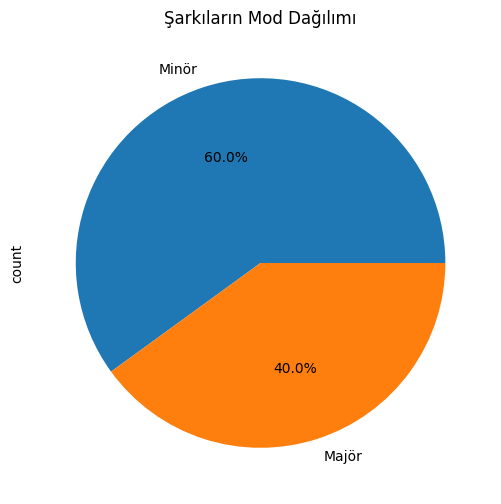

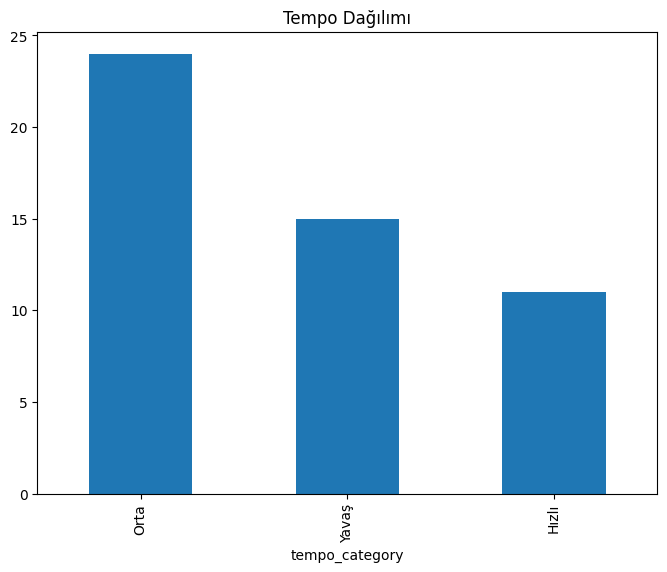

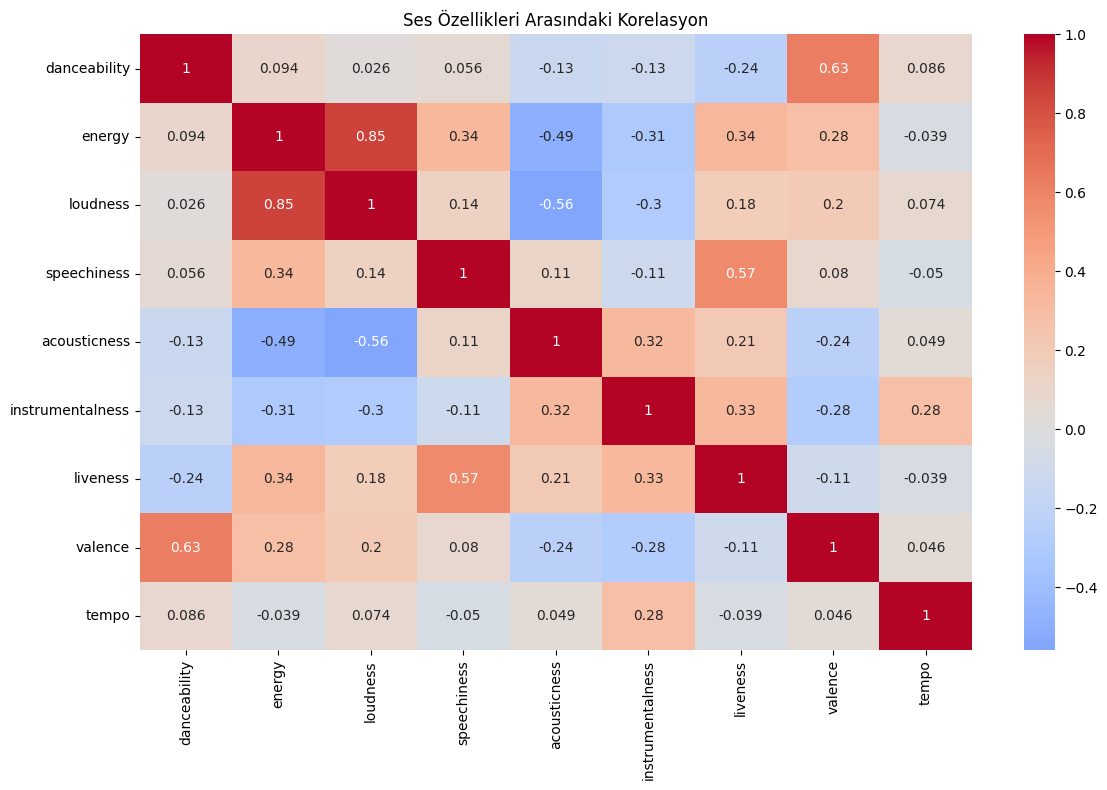

In [4]:
# Ses özelliklerini içeren sütunları seçelim
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Her bir özellik için ortalama değerleri hesaplayalım
audio_features_mean = global_50_df[audio_features].mean()

# Görselleştirme
plt.figure(figsize=(12, 6))
audio_features_mean.plot(kind='bar')
plt.title('Global Top 50 Şarkıların Ortalama Ses Özellikleri')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dans edilebilirlik ve enerji ilişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=global_50_df, x='danceability', y='energy', hue='popularity')
plt.title('Dans Edilebilirlik ve Enerji İlişkisi')
plt.show()

# Şarkıları mod (majör/minör) bazında gruplandırma
mode_distribution = global_50_df['mode'].value_counts()
plt.figure(figsize=(8, 6))
mode_distribution.plot(kind='pie', autopct='%1.1f%%', labels=['Minör', 'Majör'])
plt.title('Şarkıların Mod Dağılımı')
plt.show()

# Tempo kategorileri oluşturalım
def tempo_category(tempo):
    if tempo < 100:
        return 'Yavaş'
    elif tempo < 130:
        return 'Orta'
    else:
        return 'Hızlı'

global_50_df['tempo_category'] = global_50_df['tempo'].apply(tempo_category)
tempo_dist = global_50_df['tempo_category'].value_counts()
plt.figure(figsize=(8, 6))
tempo_dist.plot(kind='bar')
plt.title('Tempo Dağılımı')
plt.show()

# Korelasyon analizi
correlation_matrix = global_50_df[audio_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Ses Özellikleri Arasındaki Korelasyon')
plt.tight_layout()
plt.show()

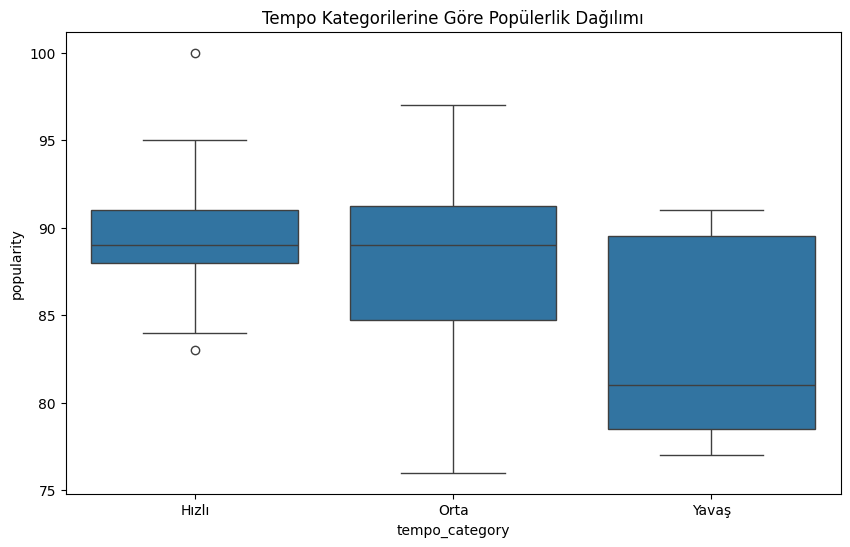

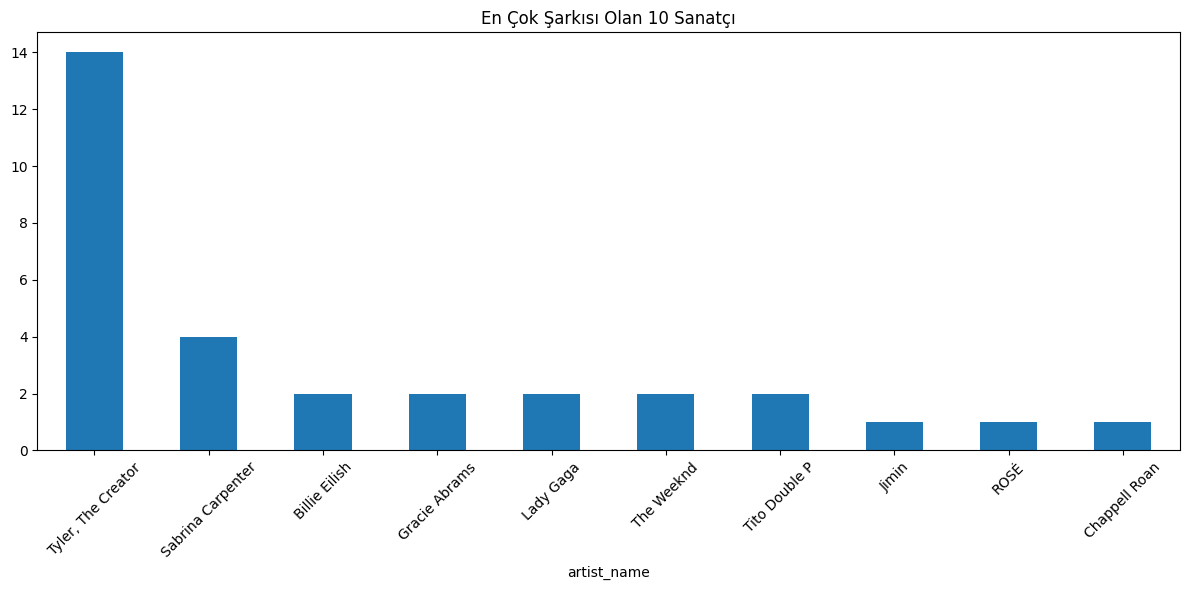

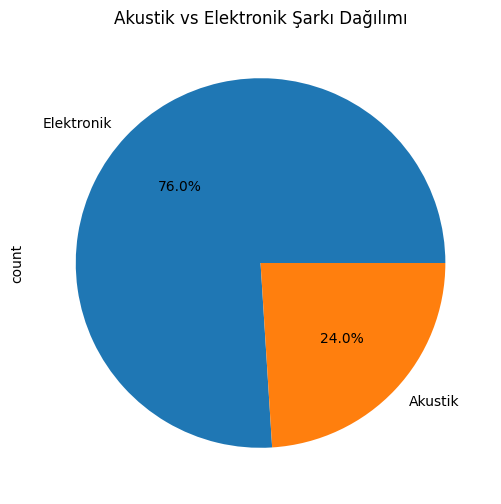

<Figure size 1000x600 with 0 Axes>

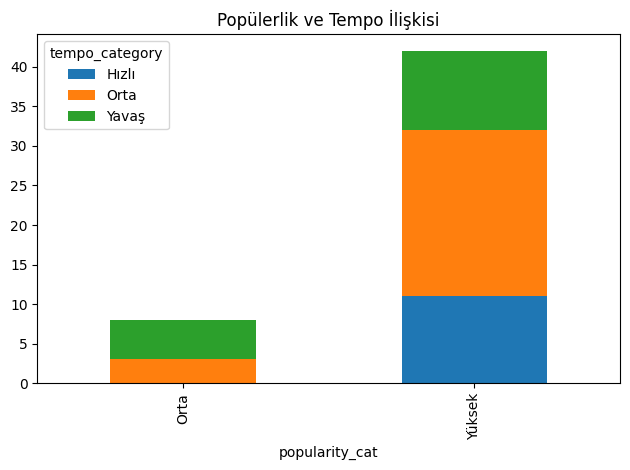

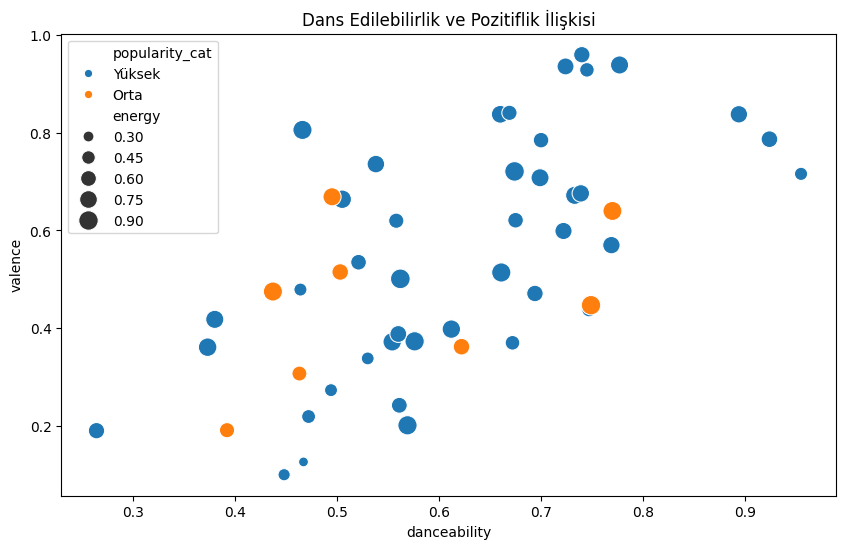

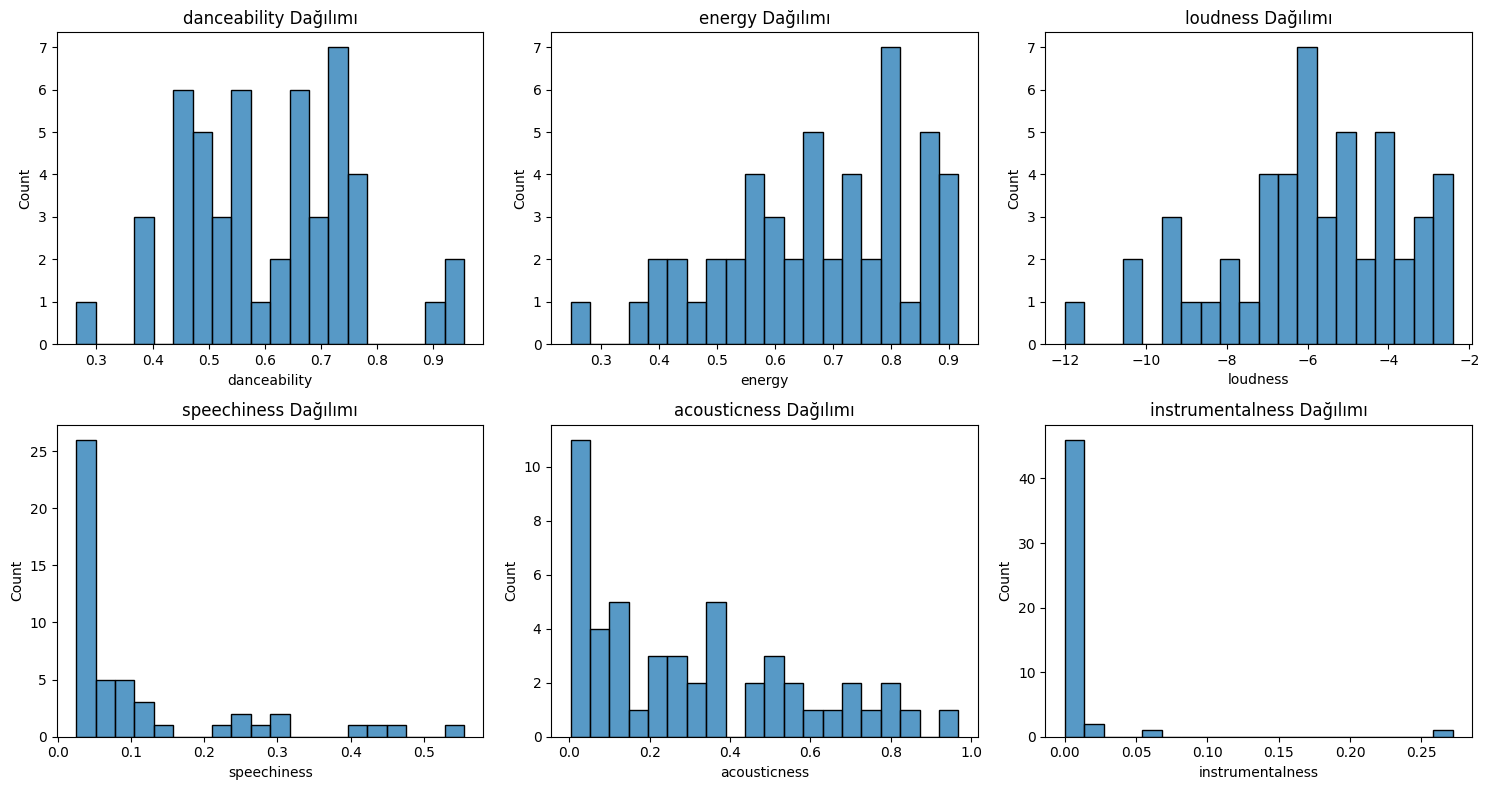

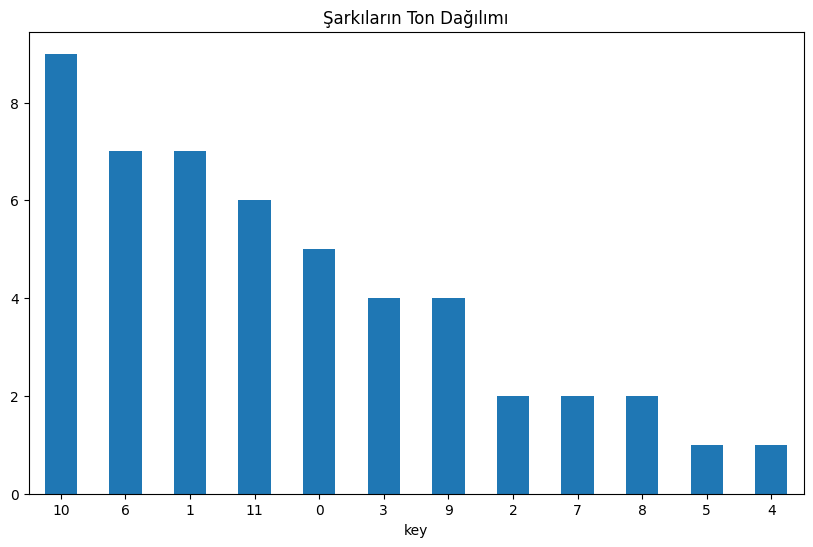

In [6]:
# 1. Popülerlik Analizi
plt.figure(figsize=(10, 6))
sns.boxplot(x='tempo_category', y='popularity', data=global_50_df)
plt.title('Tempo Kategorilerine Göre Popülerlik Dağılımı')
plt.show()

# 2. Sanatçı bazlı analiz
top_artists = global_50_df['artist_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar')
plt.title('En Çok Şarkısı Olan 10 Sanatçı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Akustik vs Elektronik Sınıflandırma
def classify_song(row):
    if row['acousticness'] > 0.5:
        return 'Akustik'
    else:
        return 'Elektronik'

global_50_df['song_type'] = global_50_df.apply(classify_song, axis=1)
song_type_dist = global_50_df['song_type'].value_counts()
plt.figure(figsize=(8, 6))
song_type_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('Akustik vs Elektronik Şarkı Dağılımı')
plt.show()

# 4. Popülerlik kategorileri
def popularity_category(pop):
    if pop < 60:
        return 'Düşük'
    elif pop < 80:
        return 'Orta'
    else:
        return 'Yüksek'

global_50_df['popularity_cat'] = global_50_df['popularity'].apply(popularity_category)

# 5. Çapraz tablo analizi
popularity_tempo_cross = pd.crosstab(global_50_df['popularity_cat'], 
                                   global_50_df['tempo_category'])
plt.figure(figsize=(10, 6))
popularity_tempo_cross.plot(kind='bar', stacked=True)
plt.title('Popülerlik ve Tempo İlişkisi')
plt.tight_layout()
plt.show()

# 6. Dans edilebilirlik ve valence (pozitiflik) ilişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=global_50_df, x='danceability', y='valence', 
                hue='popularity_cat', size='energy', sizes=(50, 200))
plt.title('Dans Edilebilirlik ve Pozitiflik İlişkisi')
plt.show()

# 7. Ses özellikleri dağılımı
plt.figure(figsize=(15, 8))
for i, feature in enumerate(audio_features[:6], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=global_50_df, x=feature, bins=20)
    plt.title(f'{feature} Dağılımı')
plt.tight_layout()
plt.show()

# 8. Key (ton) dağılımı
key_counts = global_50_df['key'].value_counts()
plt.figure(figsize=(10, 6))
key_counts.plot(kind='bar')
plt.title('Şarkıların Ton Dağılımı')
plt.xticks(rotation=0)
plt.show()

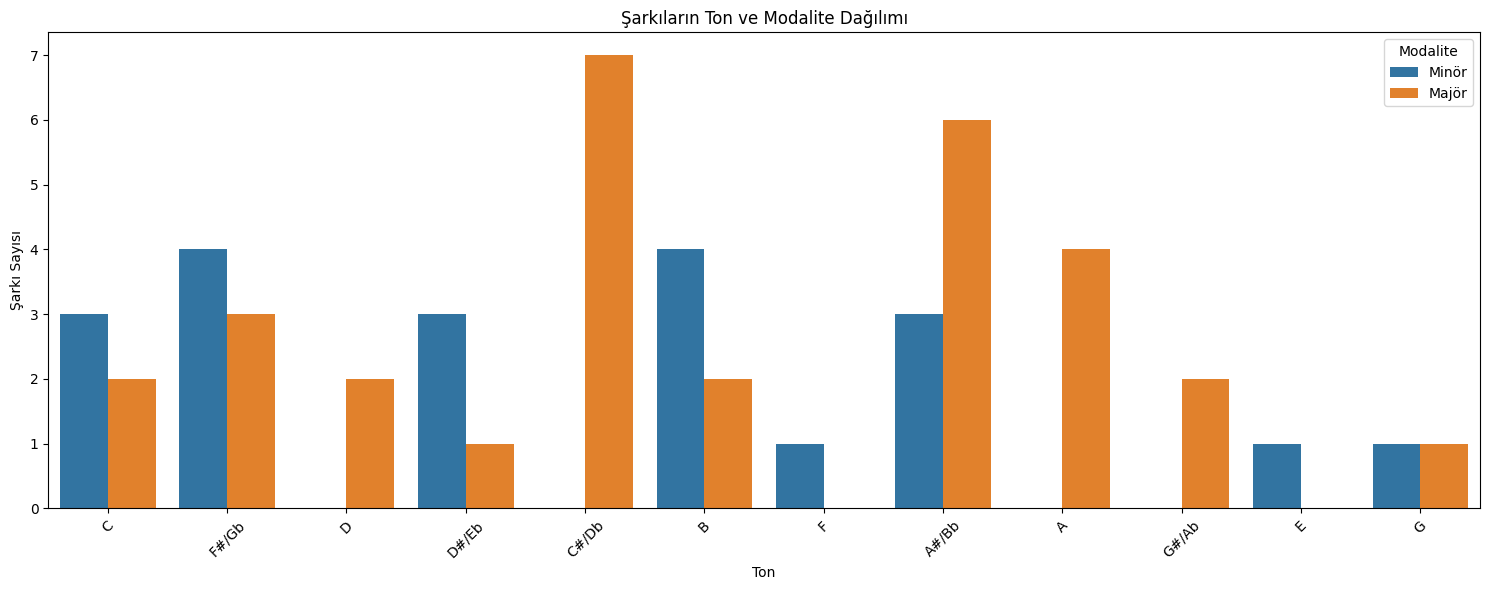

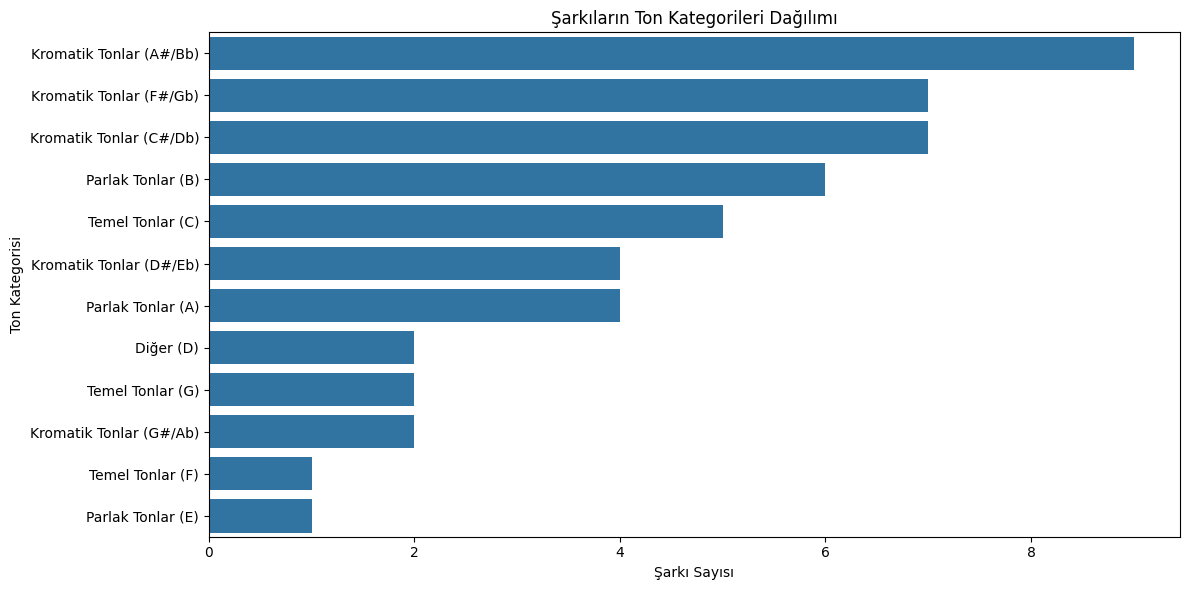

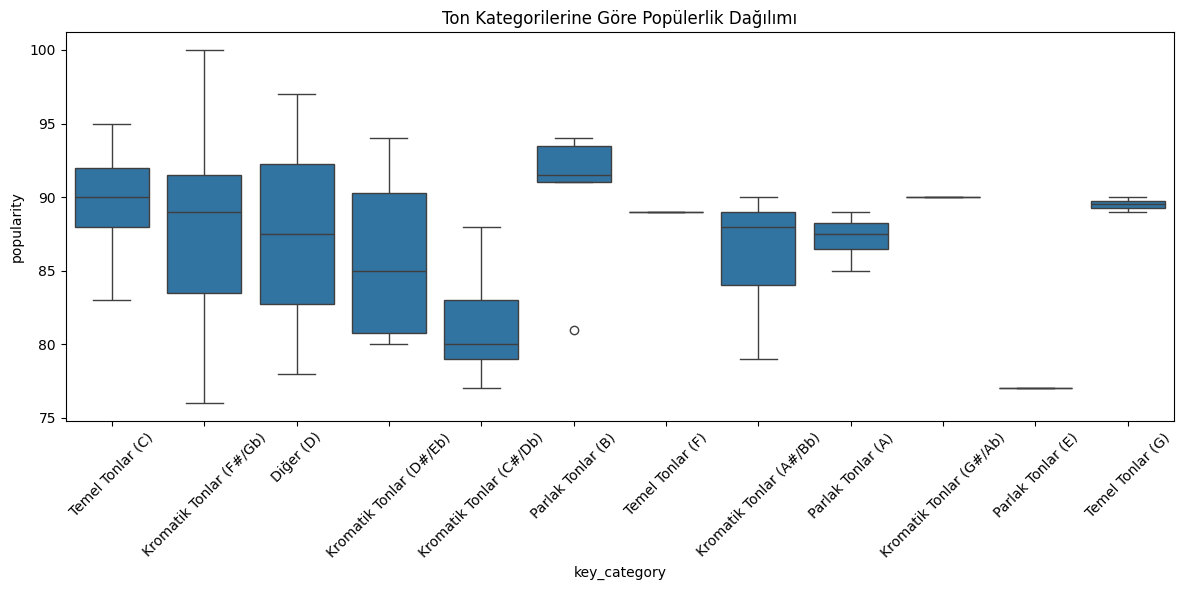

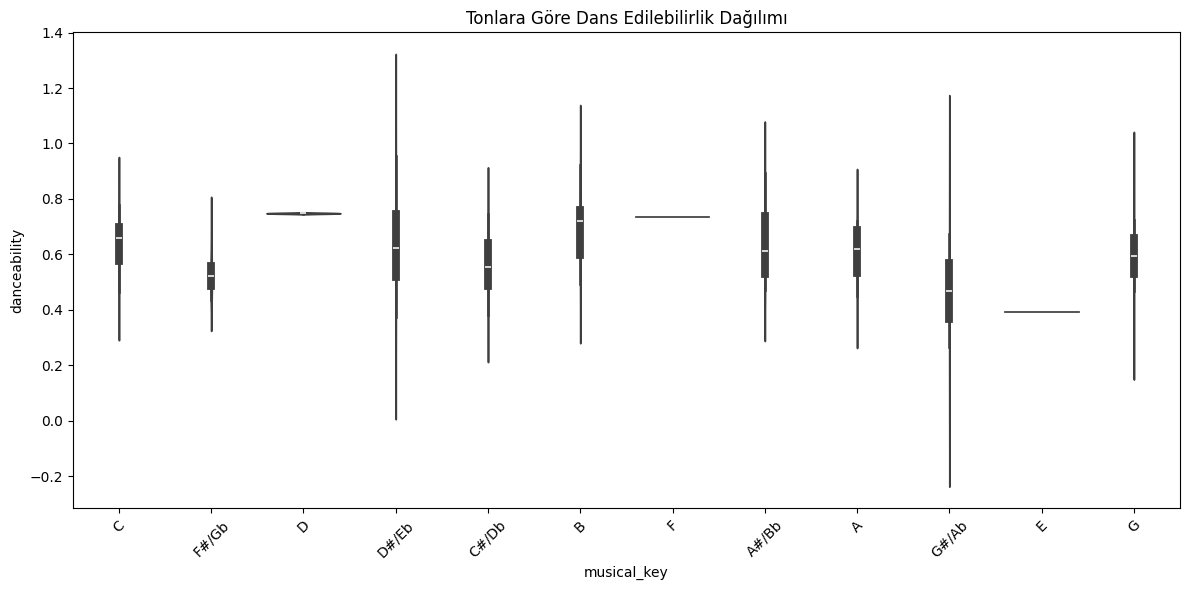

In [8]:
# Ton (key) değerlerini müzikal notasyona çevirme
key_map = {
    0: 'C',
    1: 'C#/Db',
    2: 'D',
    3: 'D#/Eb',
    4: 'E',
    5: 'F',
    6: 'F#/Gb',
    7: 'G',
    8: 'G#/Ab',
    9: 'A',
    10: 'A#/Bb',
    11: 'B'
}

# Ton değerlerini müzikal notasyona çevirelim
global_50_df['musical_key'] = global_50_df['key'].map(key_map)

# Majör/Minör bilgisini ekleyelim
global_50_df['tonality'] = global_50_df['mode'].map({0: 'Minör', 1: 'Majör'})

# Tam ton bilgisini oluşturalım
global_50_df['full_key'] = global_50_df['musical_key'] + ' ' + global_50_df['tonality']

# Ton dağılımını görselleştirelim
plt.figure(figsize=(15, 6))
sns.countplot(data=global_50_df, x='musical_key', hue='tonality')
plt.title('Şarkıların Ton ve Modalite Dağılımı')
plt.xlabel('Ton')
plt.ylabel('Şarkı Sayısı')
plt.xticks(rotation=45)
plt.legend(title='Modalite')
plt.tight_layout()
plt.show()

# Tonları kategorilere ayıralım
def categorize_key(key, mode):
    if key in [0, 5, 7]:  # C, F, G
        base = "Temel Tonlar"
    elif key in [4, 9, 11]:  # E, A, B
        base = "Parlak Tonlar"
    elif key in [1, 3, 6, 8, 10]:  # C#, D#, F#, G#, A#
        base = "Kromatik Tonlar"
    else:
        base = "Diğer"
    
    return f"{base} ({key_map[key]})"

# Ton kategorilerini oluşturalım
global_50_df['key_category'] = global_50_df.apply(
    lambda x: categorize_key(x['key'], x['mode']), axis=1)

# Ton kategorilerinin dağılımını görselleştirelim
plt.figure(figsize=(12, 6))
sns.countplot(data=global_50_df, y='key_category', order=global_50_df['key_category'].value_counts().index)
plt.title('Şarkıların Ton Kategorileri Dağılımı')
plt.xlabel('Şarkı Sayısı')
plt.ylabel('Ton Kategorisi')
plt.tight_layout()
plt.show()

# Ton kategorileri ve popülerlik ilişkisi
plt.figure(figsize=(12, 6))
sns.boxplot(data=global_50_df, x='key_category', y='popularity')
plt.title('Ton Kategorilerine Göre Popülerlik Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ton ve dans edilebilirlik ilişkisi
plt.figure(figsize=(12, 6))
sns.violinplot(data=global_50_df, x='musical_key', y='danceability')
plt.title('Tonlara Göre Dans Edilebilirlik Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

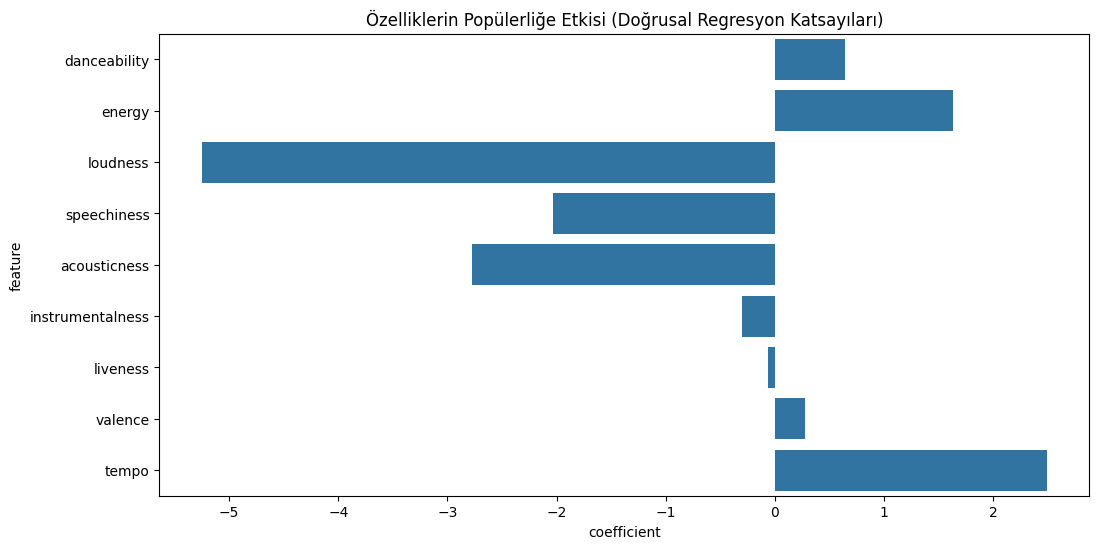


Detaylı İstatistiksel Analiz:
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     7.194
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           1.72e-05
Time:                        01:45:05   Log-Likelihood:                -105.08
No. Observations:                  40   AIC:                             230.2
Df Residuals:                      30   BIC:                             247.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.6250

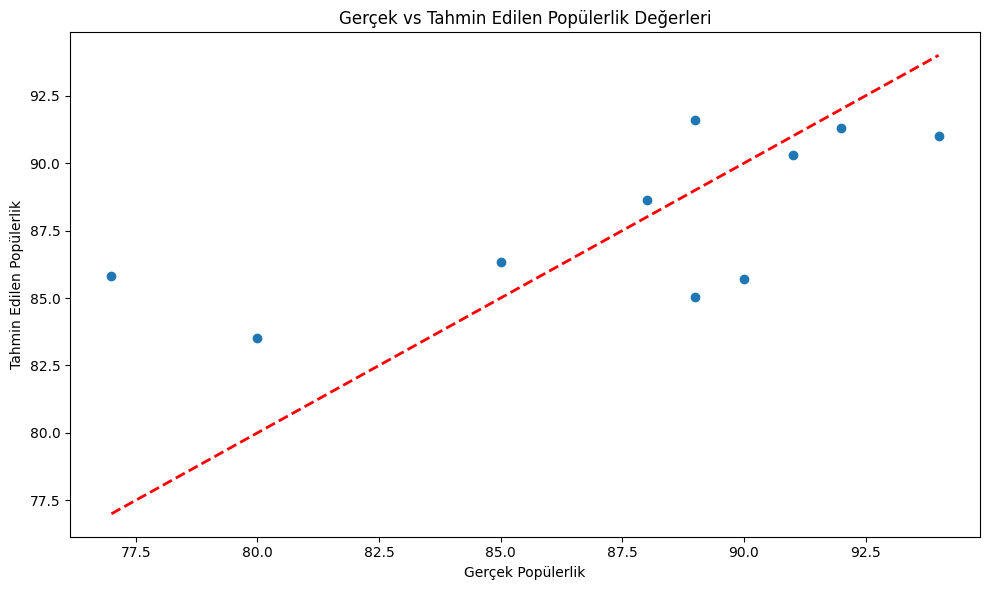

<Figure size 1200x600 with 0 Axes>

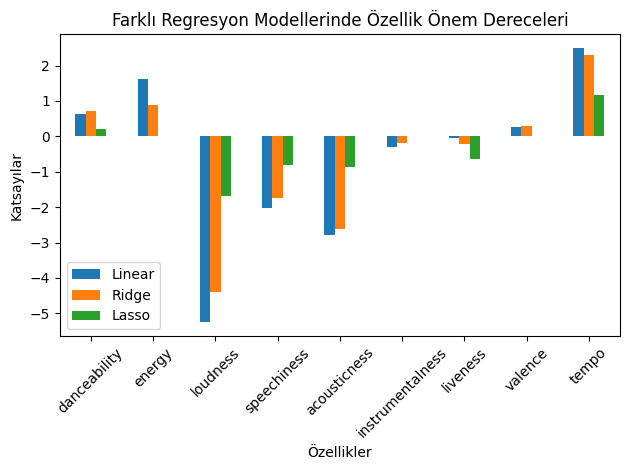

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

# Regresyon için kullanacağımız özellikleri seçelim
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

X = global_50_df[features]
y = global_50_df['popularity']

# Veriyi eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri ölçeklendirelim
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Basit Doğrusal Regresyon
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Sonuçları değerlendirelim
y_pred = lr_model.predict(X_test_scaled)
r2_lr = r2_score(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)

# Katsayıları görselleştirelim
plt.figure(figsize=(12, 6))
coef_df = pd.DataFrame({'feature': features, 'coefficient': lr_model.coef_})
sns.barplot(x='coefficient', y='feature', data=coef_df)
plt.title('Özelliklerin Popülerliğe Etkisi (Doğrusal Regresyon Katsayıları)')
plt.show()

# 2. İstatistiksel Analiz için StatsModels
X_with_const = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_with_const).fit()
print("\nDetaylı İstatistiksel Analiz:")
print(model.summary())

# 3. Ridge Regresyon
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# 4. Lasso Regresyon
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

# Farklı modellerin karşılaştırması
models = {
    'Linear Regression': lr_model,
    'Ridge': ridge_model,
    'Lasso': lasso_model
}

# Her model için R2 ve MSE değerlerini hesaplayalım
results = []
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append({'Model': name, 'R2 Score': r2, 'MSE': mse})

results_df = pd.DataFrame(results)
print("\nModel Karşılaştırması:")
print(results_df)

# Gerçek vs Tahmin değerlerini görselleştirelim
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_model.predict(X_test_scaled))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Popülerlik')
plt.ylabel('Tahmin Edilen Popülerlik')
plt.title('Gerçek vs Tahmin Edilen Popülerlik Değerleri')
plt.tight_layout()
plt.show()

# Özellik önem derecelerini karşılaştıralım
plt.figure(figsize=(12, 6))
importance_df = pd.DataFrame({
    'Linear': lr_model.coef_,
    'Ridge': ridge_model.coef_,
    'Lasso': lasso_model.coef_
}, index=features)
importance_df.plot(kind='bar')
plt.title('Farklı Regresyon Modellerinde Özellik Önem Dereceleri')
plt.xlabel('Özellikler')
plt.ylabel('Katsayılar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()